<a href="https://www.kaggle.com/code/kirtimathur/indian-airlines?scriptVersionId=120173881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/kirtimathur/indian-airlines-data/Data_Train.xlsx


### Analysis from customer point of view

#### Loading the Data set and checking its size.

In [2]:
df=pd.read_excel("/kaggle/input/d/kirtimathur/indian-airlines-data/Data_Train.xlsx")
df.shape

(10683, 11)

#### Checking top 5 rows of the data

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Basic information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- There is 1 missing value in two of the columns, Route and Total_Stops 

#### Checking Null values sum for columns of the dataset.

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Checking the row for Route, where we see both missing values are in one row

In [6]:
df[df["Route"].isnull()] 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


- So Route and Total_Stops should be accordingly.

In [7]:
df["Total_Stops"].mode()

0    1 stop
dtype: object

In [8]:
df["Route"].mode()

0    DEL → BOM → COK
dtype: object

- It can be inferred that mode for both Route and Total_Stops are in accordance.

#### Filling the Null values using mode for both the columns, Route and Total_Stops.

In [9]:
df["Total_Stops"].fillna(df["Total_Stops"].mode()[0],inplace=True)

In [10]:
df["Route"].fillna(df["Route"].mode()[0],inplace=True)

In [11]:
#sum of all null values of data is 0 now
df.isnull().sum().sum()

0

#### Checking unique values for all the columns

In [12]:
for i in df.columns:
    print(i,"---",df[i].unique())

Airline --- ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey --- ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source --- ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination --- ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route --- ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → CO

- For Destination column, New Delhi and Delhi imply the same airport for changing New Delhi to Delhi

In [13]:
df["Destination"]=df["Destination"].replace("New Delhi","Delhi")
df["Destination"].unique() #checking uniques for Destination column

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

#### Changing data tyoe of Date_of_Journey, Dep_Time, Arrival_Time columns from object to datetime

In [14]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [15]:
df.info() #datatypes changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


#### Extracting day and month from date of journey; hour and minute from departure time; hour and minute from arrival time

In [16]:
#extracting  day 
df["day_of_journey"] = df["Date_of_Journey"].dt.day
#extracting month
df["month_of_journey"] = df["Date_of_Journey"].dt.month

#extracting  departure Hours
df["Dep_hour"] = df["Dep_Time"].dt.hour
#extracting departure Minutes
df["Dep_min"] = df["Dep_Time"].dt.minute

#extracting  arrival Hours
df["arrival_hour"] = df["Arrival_Time"].dt.hour
#extracting arrival Minutes
df["arrival_min"] = df["Arrival_Time"].dt.minute

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10683 non-null  object        
 1   Date_of_Journey   10683 non-null  datetime64[ns]
 2   Source            10683 non-null  object        
 3   Destination       10683 non-null  object        
 4   Route             10683 non-null  object        
 5   Dep_Time          10683 non-null  datetime64[ns]
 6   Arrival_Time      10683 non-null  datetime64[ns]
 7   Duration          10683 non-null  object        
 8   Total_Stops       10683 non-null  object        
 9   Additional_Info   10683 non-null  object        
 10  Price             10683 non-null  int64         
 11  day_of_journey    10683 non-null  int64         
 12  month_of_journey  10683 non-null  int64         
 13  Dep_hour          10683 non-null  int64         
 14  Dep_min           1068

#### Dropping Departure and Arrival time columns, and date column, as they are not usefull now.

In [18]:
df.drop(columns=["Dep_Time","Arrival_Time","Date_of_Journey"],inplace=True)

In [19]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


#### Duration columns data should to be changed to all numeric, so converting it into minutes
- eval: takes string in the form of expression and gives value accordingly

In [20]:
df["Duration"]=df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [21]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25


#### Changing Total Stops data column to numeric

In [22]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [23]:
df["Total_Stops"].unique()

array([0, 2, 1, 3, 4])

 #### Highest priced Airline and route of that Airline

In [24]:
df["Price"].max()

79512

In [25]:
df.groupby(["Route","Price"])["Airline"].agg(["max"]).sort_values(by="Price",ascending=False)[0:1]

,,max
Route,Price,
BLR → BOM → DEL,79512,Jet Airways Business


 #### Lowest price airlines and the route of that Airline

In [26]:
df["Price"].min()

1759

In [27]:
df.groupby(["Route","Price"])["Airline"].agg(["min"]).sort_values(by="Price",ascending=False)[0:1]

,,min
Route,Price,
BLR → BOM → DEL,79512,Jet Airways Business


#### Month in which highest price flight was booked

In [28]:
df.groupby(["month_of_journey"])["Price"].max().sort_values(ascending=False)[0:1]

month_of_journey
1    79512
Name: Price, dtype: int64

#### Month in which lowest price flight was booked

In [29]:
df.groupby(["month_of_journey"])["Price"].min().sort_values()[0:1]

month_of_journey
3    1759
Name: Price, dtype: int64

#### Most expensive and least expensive month on the basis of price to travel

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

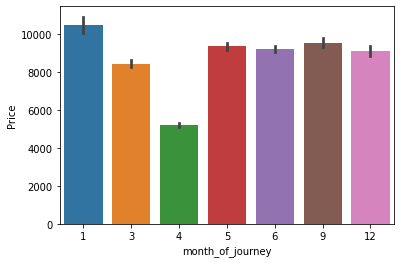

In [30]:
sns.barplot(df["month_of_journey"],df["Price"],data=df)

#### Preference of Total stops

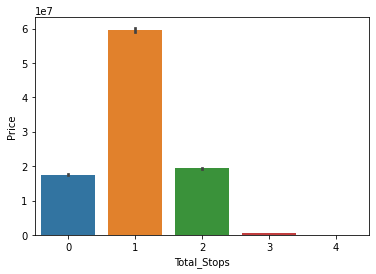

In [31]:
import warnings
warnings.filterwarnings("ignore")
sns.barplot(df["Total_Stops"],df["Price"],data=df,estimator=sum);

#### The highest duration of a flight

In [32]:
df["Duration"].max()

2860

#### Details of maximum duration flight

In [33]:
df[df["Duration"]==df["Duration"].max()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
10456,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2860,2,No info,20694,3,6,19,10,18,50


#### Checking correlation between numeric data

In [34]:
df.corr()

,Duration,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
Duration,1.000000,0.738025,0.506371,-0.038480,0.055152,0.002001,-0.018938,0.051434,-0.069653
Total_Stops,0.738025,1.000000,0.603883,-0.024156,0.065498,-0.061490,-0.002591,0.038123,-0.106939
Price,0.506371,0.603883,1.000000,-0.165412,0.010700,0.006819,-0.024492,0.024264,-0.086155
day_of_journey,-0.038480,-0.024156,-0.165412,1.000000,-0.264899,-0.002251,-0.016521,-0.002124,-0.021424
month_of_journey,0.055152,0.065498,0.010700,-0.264899,1.000000,0.028180,0.002152,-0.004338,-0.025786
Dep_hour,0.002001,-0.061490,0.006819,-0.002251,0.028180,1.000000,-0.024806,0.005215,0.067909
Dep_min,-0.018938,-0.002591,-0.024492,-0.016521,0.002152,-0.024806,1.000000,0.043054,-0.017594
arrival_hour,0.051434,0.038123,0.024264,-0.002124,-0.004338,0.005215,0.043054,1.000000,-0.154362
arrival_min,-0.069653,-0.106939,-0.086155,-0.021424,-0.025786,0.067909,-0.017594,-0.154362,1.000000


#### Heatmap of correlation

<AxesSubplot:>

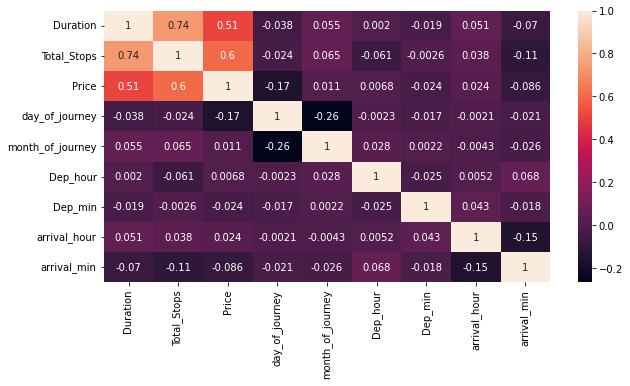

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

- Total stops and duration has 0.74 which means there's a strong correlation.
- Price and duration has 0.51 which is fairly strong correlation.
- Price and total stops has 0.6 which is strong correlation.

#### Statistical summary

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10683.0,643.093232,507.862001,5.0,170.0,520.0,930.0,2860.0
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
day_of_journey,10683.0,12.682205,8.803701,3.0,5.0,6.0,21.0,27.0
month_of_journey,10683.0,5.534775,2.987489,1.0,3.0,5.0,6.0,12.0
Dep_hour,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
arrival_hour,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0


- Least duration can't be 5 minutes, so have to correct it.

In [37]:
df.describe(include="object").T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Source,10683,5,Delhi,4537
Destination,10683,5,Cochin,4537
Route,10683,128,DEL → BOM → COK,2377
Additional_Info,10683,10,No info,8345


#### Checking data of duration 5 row

In [38]:
df[df["Duration"]==5]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5,2,No info,17327,3,6,16,50,16,55


#### Looking for rows of similar data

In [39]:
x=df[(df["Source"]=="Mumbai") & (df["Destination"]=="Hyderabad") & (df["Total_Stops"]==2)]
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
597,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,1775,2,No info,25139,3,6,9,40,15,15
1417,Air India,Mumbai,Hyderabad,BOM → AMD → ISK → HYD,795,2,No info,9977,3,12,1,35,14,50
1424,Jet Airways,Mumbai,Hyderabad,BOM → DED → DEL → HYD,1590,2,No info,24115,3,6,14,20,16,50
1784,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,1995,2,No info,14219,3,6,6,0,15,15
1824,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,845,2,No info,22619,3,6,9,40,23,45
2857,Air India,Mumbai,Hyderabad,BOM → COK → MAA → HYD,990,2,No info,9678,3,6,5,30,22,0
3294,Jet Airways,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,1665,2,No info,21375,3,6,13,5,16,50
3821,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,255,2,No info,16172,3,12,21,10,16,55
4402,Air India,Mumbai,Hyderabad,BOM → AMD → ISK → HYD,560,2,No info,13757,3,6,5,30,14,50
4659,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,1795,2,No info,14219,3,6,6,0,11,55


In [40]:
x["Duration"].mode() 

0     255
1     560
2     710
3    1795
4    2245
dtype: int64

- Have to consider all the factors like airline, route, so using mean of above data to replace the faulty data.

In [41]:
round(x["Duration"].mean(),2)

1101.33

#### Replacing the faulty duration

In [42]:
df["Duration"].iloc[6474]=round(x["Duration"].mean(),2)

In [43]:
df.iloc[6474]

Airline                         Air India
Source                             Mumbai
Destination                     Hyderabad
Route               BOM → GOI → PNQ → HYD
Duration                          1101.33
Total_Stops                             2
Additional_Info                   No info
Price                               17327
day_of_journey                          3
month_of_journey                        6
Dep_hour                               16
Dep_min                                50
arrival_hour                           16
arrival_min                            55
Name: 6474, dtype: object

#### Univariate analysis on price

<AxesSubplot:xlabel='Price'>

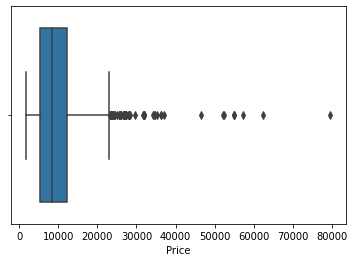

In [44]:
sns.boxplot(df["Price"])

- Most flights had price in range 5k to 15k
- 50% of data has price is < 8k

<AxesSubplot:xlabel='Price', ylabel='Density'>

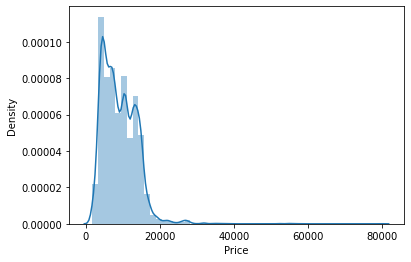

In [45]:
sns.distplot(df["Price"])

#### Total flights of each airlines

In [46]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

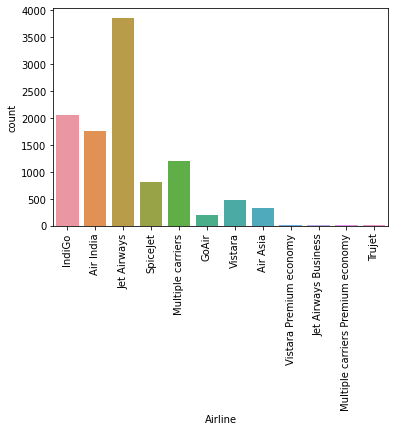

In [47]:
sns.countplot("Airline",data=df)
plt.xticks(rotation=90);

#### Boxplot to see distribution of prices for all airlines

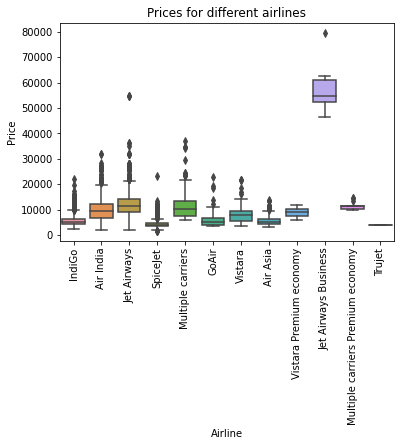

In [48]:
sns.boxplot(x="Airline",y="Price",data=df)
plt.xticks(rotation=90)
plt.title("Prices for different airlines");

- Jet airways business is the most expensive.
- Trujet airways busniess is the least expensive.

#### Fetching details of the most expensive flight

In [49]:
df[df["Airline"]=="Jet Airways Business"]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
657,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,300.0,1,No info,52229,3,1,5,45,10,45
2924,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,340.0,1,Business class,79512,3,1,5,45,11,25
5372,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,400.0,1,Business class,62427,3,1,5,45,12,25
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500.0,2,No info,46490,3,3,20,5,4,25
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500.0,2,No info,52285,3,6,20,5,4,25
10364,Jet Airways Business,Banglore,Delhi,BLR → MAA → DEL,280.0,1,Business class,57209,3,1,9,45,14,25


#### Details of the least expensive flight

In [50]:
df[df["Airline"]=="Trujet"]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,195.0,1,No info,4140,3,6,13,5,16,20


#### Total number of flights with respect to stopages

In [51]:
df["Total_Stops"].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

#### Flights corresponding to all airline with respect to the number of stopages

In [52]:
df.groupby(["Total_Stops"])["Airline"].value_counts()

Total_Stops  Airline                          
0            IndiGo                               1241
             SpiceJet                              670
             Jet Airways                           623
             Air India                             417
             Vistara                               264
             Air Asia                              181
             GoAir                                  92
             Vistara Premium economy                 3
1            Jet Airways                          2535
             Multiple carriers                    1145
             IndiGo                                793
             Air India                             541
             Vistara                               215
             SpiceJet                              148
             Air Asia                              129
             GoAir                                 102
             Multiple carriers Premium economy      13
             Jet A

- Indigo has highest number of flights i.e. 1241 and 0 stops

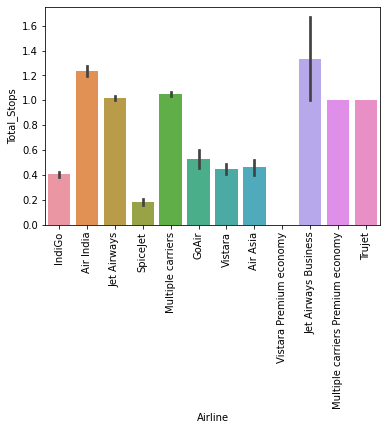

In [53]:
sns.barplot(x="Airline",y="Total_Stops",data=df)
plt.xticks(rotation=90);

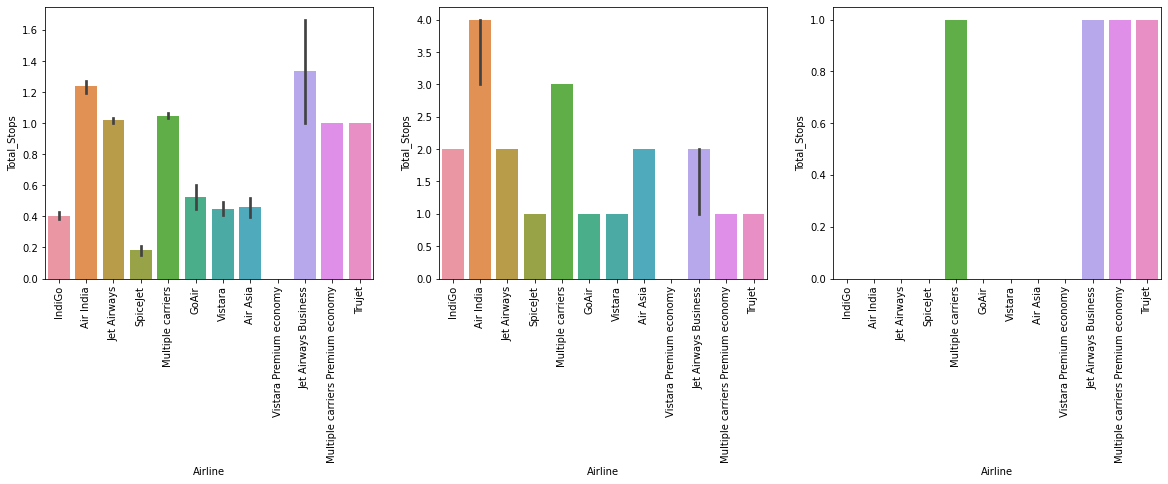

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(x="Airline",y="Total_Stops",data=df)
plt.xticks(rotation=90);
plt.subplot(1,3,2)
sns.barplot(x="Airline",y="Total_Stops",data=df,estimator=max)
plt.xticks(rotation=90);
plt.subplot(1,3,3)
sns.barplot(x="Airline",y="Total_Stops",data=df,estimator=min)
plt.xticks(rotation=90);

- Only vistara premium economy has 0 stops

#### Relation of price with the total stops

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

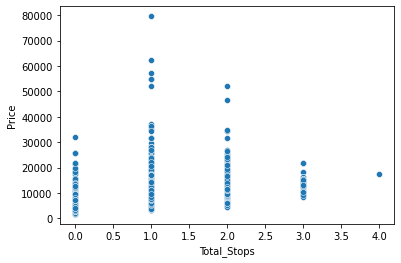

In [55]:
sns.scatterplot(x="Total_Stops",y="Price",data=df)

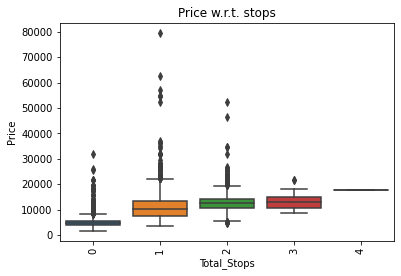

In [56]:
sns.boxplot(x="Total_Stops",y="Price",data=df)
plt.xticks(rotation=90)
plt.title("Price w.r.t. stops");

#### Count of flight available from source to destination

In [57]:
df.groupby(["Source","Destination"])["Airline"].value_counts()

Source    Destination  Airline                          
Banglore  Delhi        Jet Airways                           788
                       IndiGo                                523
                       Air India                             332
                       Vistara                               185
                       SpiceJet                              181
                       GoAir                                  93
                       Air Asia                               89
                       Jet Airways Business                    4
                       Vistara Premium economy                 2
Chennai   Kolkata      IndiGo                                184
                       SpiceJet                              128
                       Vistara                                43
                       Air India                              25
                       Vistara Premium economy                 1
Delhi     Cochin       Jet Airway

#### Max,min and avg price of different flights from source to destination

In [58]:
k=df.groupby(["Source","Destination","Airline"])["Price"].agg(["mean","max","min"])
k.reset_index(inplace=True)
k

,Source,Destination,Airline,mean,max,min
0,Banglore,Delhi,Air Asia,4574.280899,10873,3383
1,Banglore,Delhi,Air India,9238.198795,31783,3758
2,Banglore,Delhi,GoAir,4948.881720,18558,3398
3,Banglore,Delhi,IndiGo,5274.112811,22153,3359
4,Banglore,Delhi,Jet Airways,11021.732234,54826,3359
5,Banglore,Delhi,Jet Airways Business,62844.250000,79512,52229
6,Banglore,Delhi,SpiceJet,4550.292818,23267,3257
7,Banglore,Delhi,Vistara,6182.172973,21730,4353
8,Banglore,Delhi,Vistara Premium economy,8881.000000,11793,5969
9,Chennai,Kolkata,Air India,5895.640000,19630,3145


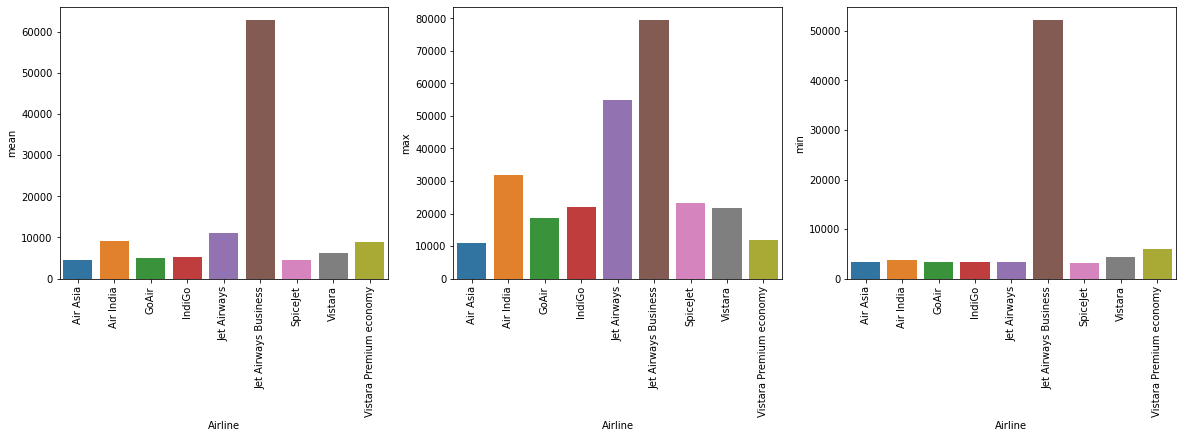

In [59]:
k1=k[0:9]
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(x="Airline",y="mean",data=k1)
plt.xticks(rotation=90);
plt.subplot(1,3,2)
sns.barplot(x="Airline",y="max",data=k1)
plt.xticks(rotation=90);
plt.subplot(1,3,3)
sns.barplot(x="Airline",y="min",data=k1)
plt.xticks(rotation=90);

#### Variation of flight price according to different sources

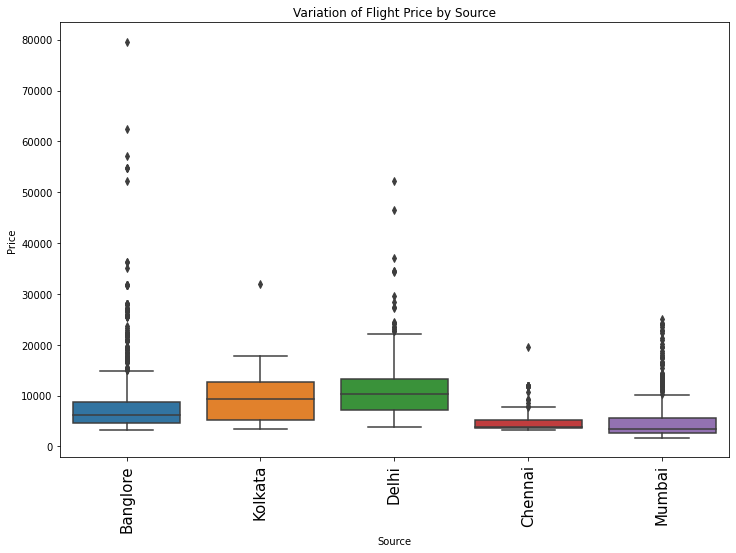

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Source",y="Price",data=df)
plt.xticks(rotation=90,size=15)
plt.title("Variation of Flight Price by Source");

#### Variation of flight price according to different destinations

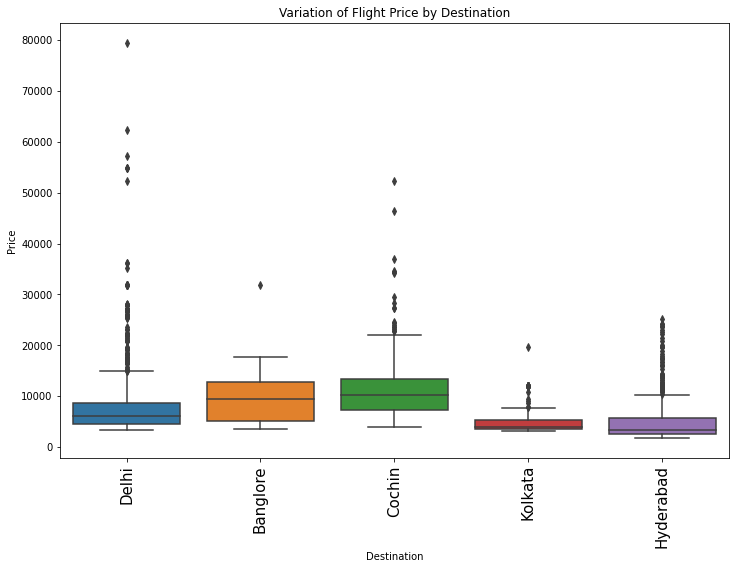

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Destination",y="Price",data=df)
plt.xticks(rotation=90,size=15)
plt.title("Variation of Flight Price by Destination");

- Most landings are in Banglore.
- Least landings are in Kolkata.

#### Month of peak booking in terms the total number of flights took off (not from selling point of view)

<AxesSubplot:xlabel='month_of_journey', ylabel='count'>

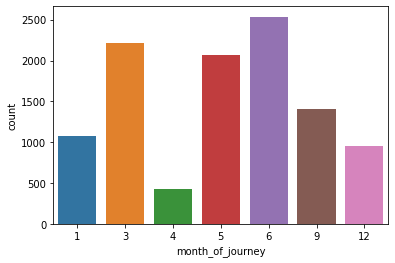

In [62]:
sns.countplot(x="month_of_journey",data=df)

- Maximum flights took off on month 6, June
- Minimum flights took of on month 4, April (off-season)

#### Peak business month based on total sales

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

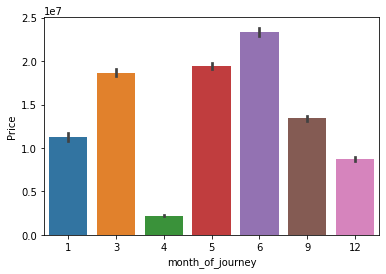

In [63]:
sns.barplot(x="month_of_journey",y="Price",data=df,estimator=sum) 

- June and April had maximum and minimum sale in terms of business as well on the basis of total sale.

#### Peak business month based on average sales

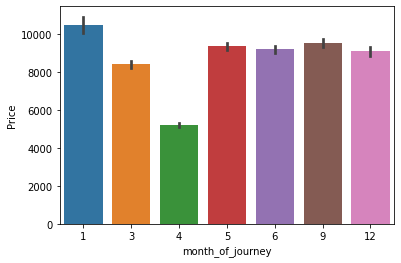

In [64]:
sns.barplot(x="month_of_journey",y="Price",data=df);

- January has maximum sales based on average.

#### Month wise took off of flights 

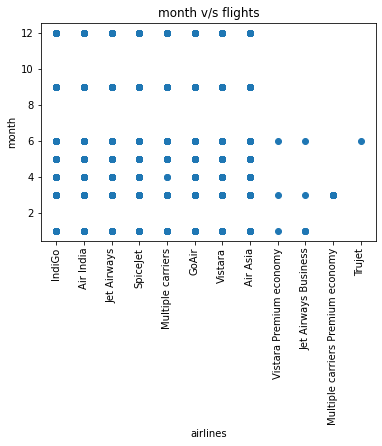

In [65]:
plt.scatter(df["Airline"],df["month_of_journey"])
plt.xticks(rotation=90)
plt.xlabel("airlines")
plt.ylabel("month")
plt.title("month v/s flights");

- From Indigo to Air Asia took off in all months.
- Trujet took off the least,in just one month.

#### Flights that took off in each month for each airline

In [66]:
df.groupby(["month_of_journey"])["Airline"].value_counts()

month_of_journey  Airline          
1                 Jet Airways          430
                  Air India            197
                  IndiGo               184
                  SpiceJet              76
                  Multiple carriers     75
                                      ... 
12                Multiple carriers     65
                  SpiceJet              54
                  Vistara               52
                  Air Asia              29
                  GoAir                 12
Name: Airline, Length: 64, dtype: int64

- In January most flights of jet airways took off.

#### Variation of price with months

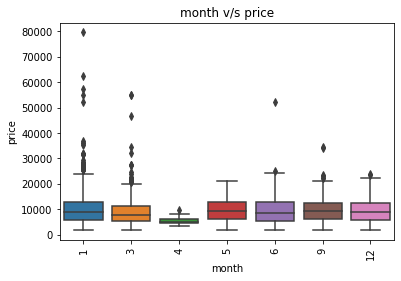

In [67]:
sns.boxplot(x="month_of_journey",y="Price",data=df)
plt.xticks(rotation=90)
plt.xlabel("month")
plt.ylabel("price")
plt.title("month v/s price");

- May, June, September, December have same prices.
- Only April has less prices.

#### The peak day of flights bookings

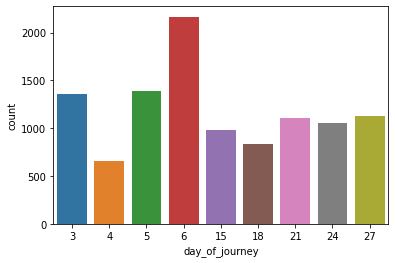

In [68]:
sns.countplot(x="day_of_journey",data=df);

#### Peak day of sales

Text(0.5, 1.0, 'peak day')

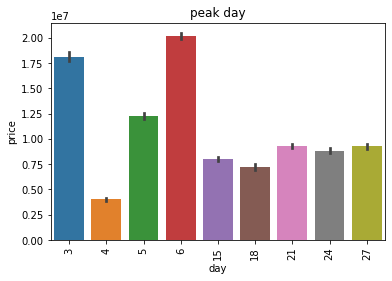

In [69]:
sns.barplot(x="day_of_journey",y="Price",data=df,estimator=sum)
plt.xticks(rotation=90)
plt.xlabel("day")
plt.ylabel("price")
plt.title("peak day")

#### Variation of day with the price

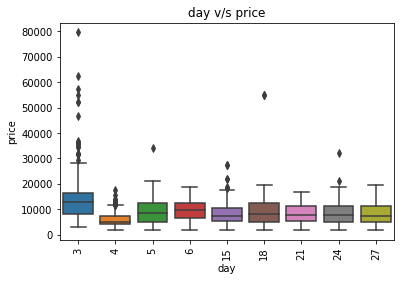

In [70]:
sns.boxplot(x="day_of_journey",y="Price",data=df)
plt.xticks(rotation=90)
plt.xlabel("day")
plt.ylabel("price")
plt.title("day v/s price");

- Day does not matter for the prices of flights.

#### Peak departure time

In [71]:
df["Dep_hour"].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

- 9 am is peak departure time for all airlines.

#### Peak departure time for different flights.

In [72]:
df.groupby(["Airline"])["Dep_hour"].value_counts()

Airline                  Dep_hour
Air Asia                 7           53
                         22          39
                         19          37
                         16          33
                         23          33
                                     ..
Vistara                  10           1
                         12           1
Vistara Premium economy  7            1
                         11           1
                         16           1
Name: Dep_hour, Length: 149, dtype: int64

#### Peak departure hour for particular source (to find rush hour)

In [73]:
df.groupby(["Source","Airline"])["Dep_hour"].value_counts()

Source    Airline    Dep_hour
Banglore  Air Asia   23          33
                     11          24
                     4           23
                     5            9
          Air India  6           53
                                 ..
Mumbai    Vistara    11           2
                     20           2
                     10           1
                     14           1
                     19           1
Name: Dep_hour, Length: 308, dtype: int64

#### Peak arrival hour 

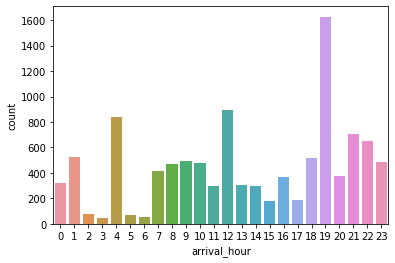

In [74]:
sns.countplot(x="arrival_hour",data=df);

- 7 PM is the peak arrival hour.

#### Peak arrival time for different flights

In [75]:
df.groupby(["Airline"])["arrival_hour"].value_counts()

Airline                  arrival_hour
Air Asia                 22              63
                         7               52
                         13              36
                         2               33
                         1               30
                                         ..
Vistara                  16               5
                         21               3
Vistara Premium economy  9                1
                         14               1
                         18               1
Name: arrival_hour, Length: 144, dtype: int64

#### Peak arrival hour for particular destinations (to find rush hour)

In [76]:
df.groupby(["Destination","Airline"])["arrival_hour"].value_counts()

Destination  Airline                  arrival_hour
Banglore     Air Asia                 22              34
                                      1               30
                                      12              30
                                      23              24
                                      10              21
                                                      ..
Kolkata      SpiceJet                 20              41
             Vistara                  9               24
                                      20              18
                                      10               1
             Vistara Premium economy  9                1
Name: arrival_hour, Length: 279, dtype: int64